In [17]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from tqdm import trange
import csv
import cv2
import graphviz
import matplotlib.pyplot as plt

In [7]:
import zipfile
import os

if not os.path.isdir('/tmp/asl_alphabet_test'):
    with zipfile.ZipFile('../dataset/archive.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/')

X_train = []
Y_train = []

asl = {
"A" : 0,
"B" : 1,
"C" : 2,
"D" : 3,
"E" : 4,
"F" : 5,
"G" : 6,
"H" : 7,
"I" : 8,
"J" : 9,
"K" : 10,
"L" : 11,
"M" : 12,
"N" : 13,
"O" : 14,
"P" : 15,
"Q" : 16,
"R" : 17,
"S" : 18,
"T" : 19,
"U" : 20,
"V" : 21,
"W" : 22,
"X" : 23,
"Y" : 24,
"Z" : 25,
"nothing": 26,
"del" : 27,
"space" : 28
}

def walk_dir(path):
    for l in os.listdir(path):
        fp = path + '/' + l
        if os.path.isdir(fp):
            walk_dir(fp)
        else:
            img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            X_train.append(img)
            if "nothing" in l: 
                label = "nothing"
            elif "del" in l:
                label = "del"
            elif "space" in l:
                label = "space"
            else:
                label = l[0]
            Y_train.append(asl[label])
            
walk_dir('/tmp/asl_alphabet_train')

X_train = np.array(X_train)
Y_train = np.array(Y_train)

tensor([5]) 11


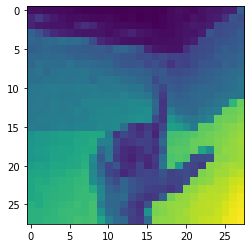

In [13]:
num = random.randint(0, X_train.shape[0])
imshow(X_train[num])
x = torch.tensor(X_train[num]).float()
out = model(x)
print(torch.argmax(out, dim=1), Y_train[num])

In [ ]:
X_train = []
Y_train = []

with open('../dataset/mnist_dataset/mnist_train_100.csv', 'r') as f:
    csvfile = csv.reader(f, delimiter=',', quotechar='|')
    for row in csvfile:
        t = list(map(int, row))
        X_train.append(t[1:])
        Y_train.append(t[0])
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
BS = 300
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters()) 
losses, accuracies = [], []

for i in (t := trange(100)):
    samp = np.random.randint(0, X_train.shape[0], size=(BS))
    X = torch.tensor(X_train[samp]).float()
    Y = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out, dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_function(out, Y)
    accuracies.append(accuracy)
    losses.append(loss)
    loss.backward()
    optim.step()
    t.set_description("loss: %.4f accuracy: %.4f" % (loss, accuracy))

loss: 3.3683 accuracy: 0.0533: 100%|██████████| 100/100 [00:00<00:00, 119.51it/s]


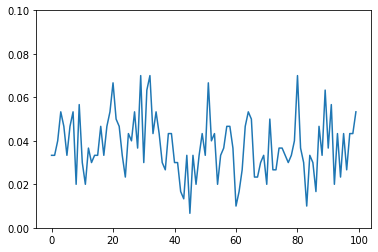

In [27]:
plt.ylim(0, 0.1)
plt.plot(accuracies)
plt.plot(losses)
plt.savefig('anal.png')

In [4]:
from torchviz import make_dot, make_dot_from_trace

class Net(nn.Module):
    def __init__(self):
            super(Net, self).__init__()
            
            self.l1 = nn.Linear(28 * 28, 270) 
            self.l2 = nn.Linear(270, 128)
            self.l3 = nn.Linear(128, 29)
            
    def forward(self, x):
        x = x.view(-1, 28 * 28) 
        
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        
        return x

x = torch.randn(1,28 * 28)
model = Net()
# VGG16 with BatchNorm


In [42]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.pool = nn.MaxPool2d(2, 2)

        self.l1 = nn.Linear(16 * 4 * 4, 270) 
        self.l2 = nn.Linear(270, 128)
        self.l3 = nn.Linear(128, 29)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        print(x.shape)
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        
        return x

x = torch.randn(1, 1, 28, 28)
model = Net()
make_dot(model(x), params=dict(model.named_parameters())).save()

torch.Size([1, 16, 4, 4])


'Digraph.gv'